In [2]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='F:\\Learning\\DL\\Audio Processing Data\\Dog Bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[-0.0025076  -0.00840731 -0.01141177 ... -0.0004176   0.00372041
 -0.00631704]


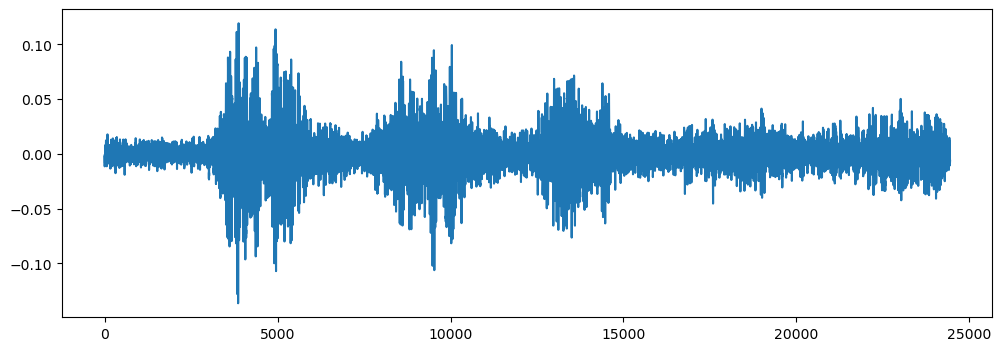

In [4]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [5]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [6]:
wave_audio

array([[ -1158400,  -7211264],
       [ -4520448, -21143296],
       [-11453952, -29221376],
       ...,
       [-20677632,  41668608],
       [-24520192,  17233152],
       [-34802176,  -9847552]])

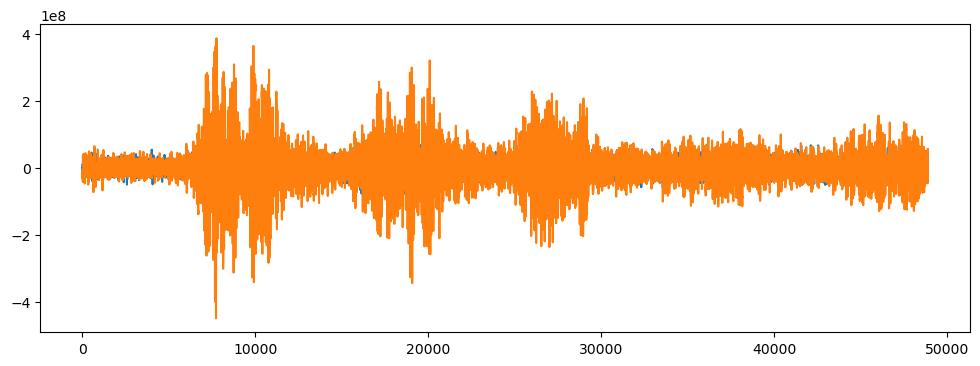

In [7]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)


# Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 48)


In [9]:
mfccs


array([[-3.6389172e+02, -3.3030676e+02, -3.2821185e+02, ...,
        -2.8512653e+02, -2.8603470e+02, -2.9389331e+02],
       [ 6.9109741e+01,  6.5196510e+01,  6.0077950e+01, ...,
         9.0861023e+01,  8.8064575e+01,  7.8831360e+01],
       [ 3.1173122e+00,  2.5547522e-01, -3.4055147e+00, ...,
        -1.7920200e+01, -1.8576180e+01, -1.5062199e+01],
       ...,
       [-7.0346153e-01, -2.5646772e+00, -3.5947187e+00, ...,
         5.1249671e+00,  3.4673510e+00,  9.6641380e-01],
       [ 3.9533246e+00,  2.5741525e+00,  3.4853370e+00, ...,
        -1.1368206e+01, -8.3031464e+00, -3.3199394e+00],
       [-4.7302952e+00, -5.5607362e+00, -5.7650882e-01, ...,
        -5.4708247e+00, -6.9308758e+00, -4.4456120e+00]], dtype=float32)

In [10]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='F:\\Learning\\DL\\UrbanSound8K.tar\\UrbanSound8K\\audio'
metadata=pd.read_csv('F:\\Learning\\DL\\UrbanSound8K.tar\\UrbanSound8K\\metadata\\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [09:32,  8.09it/s]C:\Users\User\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [19:49,  8.40it/s]C:\Users\User\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [19:49, 11.89it/s]C:\Users\User\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [20:38,  7.05it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [65]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [66]:
X.shape

(8732, 40)

In [67]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [68]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181764e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651115e+00]], dtype=float32)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X_train.shape

(6985, 40)

In [25]:
X_test.shape

(1747, 40)

In [26]:
y_train.shape

(6985, 10)

In [27]:
y_test.shape

(1747, 10)

# Model Creation

In [28]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [30]:
### No of classes
num_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [88]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
214/219 [============================>.] - ETA: 0s - loss: 0.8188 - accuracy: 0.7382
Epoch 1: val_loss improved from inf to 0.64632, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.8182 - accuracy: 0.7386 - val_loss: 0.6463 - val_accuracy: 0.8008
Epoch 2/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8115 - accuracy: 0.7382
Epoch 2: val_loss improved from 0.64632 to 0.63513, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.8069 - accuracy: 0.7390 - val_loss: 0.6351 - val_accuracy: 0.8094
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.7376
Epoch 3: val_loss did not improve from 0.63513
219/219 [==============================] - 1s 5ms/step - loss: 0.8115 - accuracy: 0.7376 - val_loss: 0.6505 - val_accuracy: 0.7974
Epoch 4/100
212/219 [============================>.] - ETA:

Epoch 30/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8099 - accuracy: 0.7412
Epoch 30: val_loss did not improve from 0.62435
219/219 [==============================] - 1s 5ms/step - loss: 0.8074 - accuracy: 0.7413 - val_loss: 0.6537 - val_accuracy: 0.7968
Epoch 31/100
218/219 [============================>.] - ETA: 0s - loss: 0.8202 - accuracy: 0.7364
Epoch 31: val_loss did not improve from 0.62435
219/219 [==============================] - 1s 5ms/step - loss: 0.8199 - accuracy: 0.7366 - val_loss: 0.6586 - val_accuracy: 0.7956
Epoch 32/100
215/219 [============================>.] - ETA: 0s - loss: 0.8200 - accuracy: 0.7420
Epoch 32: val_loss did not improve from 0.62435
219/219 [==============================] - 1s 5ms/step - loss: 0.8227 - accuracy: 0.7422 - val_loss: 0.6680 - val_accuracy: 0.8042
Epoch 33/100
218/219 [============================>.] - ETA: 0s - loss: 0.8281 - accuracy: 0.7275
Epoch 33: val_loss did not improve from 0.62435
219/219 [==============

219/219 [==============================] - 2s 8ms/step - loss: 0.8067 - accuracy: 0.7350 - val_loss: 0.6385 - val_accuracy: 0.8088
Epoch 60/100
212/219 [============================>.] - ETA: 0s - loss: 0.8246 - accuracy: 0.7301
Epoch 60: val_loss did not improve from 0.62364
219/219 [==============================] - 2s 8ms/step - loss: 0.8234 - accuracy: 0.7306 - val_loss: 0.6337 - val_accuracy: 0.8019
Epoch 61/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8178 - accuracy: 0.7373
Epoch 61: val_loss did not improve from 0.62364
219/219 [==============================] - 2s 7ms/step - loss: 0.8173 - accuracy: 0.7373 - val_loss: 0.6378 - val_accuracy: 0.8031
Epoch 62/100
213/219 [============================>.] - ETA: 0s - loss: 0.8046 - accuracy: 0.7372
Epoch 62: val_loss did not improve from 0.62364
219/219 [==============================] - 1s 7ms/step - loss: 0.8048 - accuracy: 0.7367 - val_loss: 0.6367 - val_accuracy: 0.8025
Epoch 63/100
213/219 [================

Epoch 89/100
213/219 [============================>.] - ETA: 0s - loss: 0.8049 - accuracy: 0.7369
Epoch 89: val_loss did not improve from 0.61198
219/219 [==============================] - 1s 6ms/step - loss: 0.8045 - accuracy: 0.7374 - val_loss: 0.6217 - val_accuracy: 0.8197
Epoch 90/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8004 - accuracy: 0.7423
Epoch 90: val_loss did not improve from 0.61198
219/219 [==============================] - 1s 5ms/step - loss: 0.7999 - accuracy: 0.7416 - val_loss: 0.6435 - val_accuracy: 0.7985
Epoch 91/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8089 - accuracy: 0.7424
Epoch 91: val_loss did not improve from 0.61198
219/219 [==============================] - 1s 5ms/step - loss: 0.8117 - accuracy: 0.7427 - val_loss: 0.6597 - val_accuracy: 0.8037
Epoch 92/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8170 - accuracy: 0.7410
Epoch 92: val_loss did not improve from 0.61198
219/219 [==============

In [89]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7979393005371094


In [48]:
filename="F:\\Learning\\DL\\Audio Processing Data\\Dog Bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
#model.predict_classes(prediction_feature)

In [49]:
# Assuming 'model' is your Sequential model
predictions = model.predict(prediction_feature)

# Assuming you want the class with the highest probability
predicted_class = int(predictions.argmax(axis=-1))

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 39ms/step
Predicted class: 1


C:\Users\User\AppData\Local\Temp\ipykernel_8664\1208980195.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions.argmax(axis=-1))


In [44]:
prediction_feature.shape

(1, 40)

In [45]:
prediction_feature

array([[-315.6028    ,   94.854805  ,  -37.22234   ,   46.778263  ,
          -6.728693  ,   10.012548  ,   -1.6075526 ,   18.51134   ,
         -11.90062   ,    7.594035  ,   -7.8546596 ,   11.362425  ,
         -15.617316  ,    3.3019907 ,  -11.958161  ,    6.35349   ,
          -5.587026  ,   20.78539   ,   -0.4692282 ,    6.0436325 ,
         -11.61955   ,    2.868675  ,  -10.176433  ,    8.332485  ,
           1.776561  ,    2.5638974 ,  -14.761061  ,    1.1465564 ,
           3.783566  ,    3.1094651 ,  -12.185813  ,   -3.0522912 ,
           3.7284143 ,    8.962752  ,    0.93064487,    3.1800797 ,
           2.4850492 ,    0.61386454,  -11.449189  ,   -6.0105853 ]],
      dtype=float32)

In [50]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [78]:
filename="F:\\Learning\\DL\\UrbanSound8K.tar\\UrbanSound8K\\audio\\fold5\\17578-5-0-2.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predictions = model.predict(mfccs_scaled_features)
predicted_class_mfcc = int(predictions.argmax(axis=-1))

print("Predicted class:", predicted_class_mfcc)

[-62.685455    87.208046    20.074617    50.3877     -11.789639
  33.61183     -1.0703436   16.585123     5.222133    16.39782
 -12.629057    18.120111    -8.766417    13.651203    -5.2661667
  10.553831    -4.58966      8.915694    -6.61753      6.909856
  -8.409428     5.6897855  -10.221438     4.9192038   -1.8592492
   4.1187086   -3.873897     5.3026166   -7.781282     8.342662
  -7.087813     4.54077      1.2262518    3.415078     3.8245761
   3.6896083   -0.37194732   6.7237906   -2.2864206    0.10842042]
[[-62.685455    87.208046    20.074617    50.3877     -11.789639
   33.61183     -1.0703436   16.585123     5.222133    16.39782
  -12.629057    18.120111    -8.766417    13.651203    -5.2661667
   10.553831    -4.58966      8.915694    -6.61753      6.909856
   -8.409428     5.6897855  -10.221438     4.9192038   -1.8592492
    4.1187086   -3.873897     5.3026166   -7.781282     8.342662
   -7.087813     4.54077      1.2262518    3.415078     3.8245761
    3.6896083   -0.3719473

C:\Users\User\AppData\Local\Temp\ipykernel_8664\695113570.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_mfcc = int(predictions.argmax(axis=-1))


In [85]:
print(type(predicted_class_mfcc))
# Assuming 'labelencoder' is your LabelEncoder object
p_class = labelencoder.inverse_transform([predicted_class_mfcc])
print(p_class.shape)

print("Predicted class:", p_class[0])

<class 'int'>
(1,)
Predicted class: engine_idling
